<a href="https://colab.research.google.com/github/Nakamura-ta-hub/suurikagakuennsyuu/blob/main/2020_1216_%E6%95%B0%E7%90%86%E7%A7%91%E5%AD%A6%E6%BC%94%E7%BF%92%E8%AA%B2%E9%A1%8C_201710702_%E4%B8%AD%E6%9D%91%E5%A4%AA%E8%AA%A0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 波動方程式

$ 
\displaystyle \frac{\partial^2 u(x,t)}{\partial t^2} =\frac{\partial^2 u(x,t)}{\partial x^2} 
$

を差分法により，$\Delta t=0.01, \Delta x=0.0125$として数値的に解く．計算の空間領域 $x=[0, 1]$  ，時間領域 $t=[0, 2]$とする．

(1)　初期条件を $u(x,0)=\mathrm{exp}[-100(x-0.5)^2]$，境界条件を $\partial u(0,t)/\partial x=\partial u(1,t)/\partial x=0$とする．この時，計算開始からしばらくの間は以下の関数

$ 
\displaystyle u(x,t)=0.5\mathrm{exp}[-100(x+t-0.5)^2]+0.5\mathrm{exp}[-100(x-t-0.5)^2]
$

と一致することをアニメーションにより示しなさい．また，波の様子についてコメントしなさい．


(2) (1)の問題では，初期条件の関数にはピークが一つだけであった．初期条件の関数としてピークが三つある関数を用いて計算を実行し，計算結果をアニメーション表示しなさい．また，波の様子についてコメントしなさい．

(3)　(1)の問題で，境界条件を $u(0,t)=u(1,t)=0$に変更して計算を実行し，計算結果をアニメーション表示しなさい．また，波の様子についてコメントしなさい．

## 計算し、アニメーションを計算する関数をつくりました。
#### その際、引数には、
## ①初期条件, 
## ②ノイマン境界条件かディリクレ境界条件か, 
## ③問題番号, 
#### を設けています。

### でも、~~うまく動いてくれない場合が多いので、~~
### コードに不備がありました。でも、結局アニメーションは動いてくれないので
### 関数を使わないバージョンも載せておきます。

In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
dx = 0.0125 # 空間ステップ
dt = 0.01 # 時間ステップ
tmin = 0.0 # 計算開始時間 
tmax = 2.0 # 計算をこの時間までする

#　ｘの計算範囲（境界）
xmin = 0.0
xmax = 1.0 

c = 1.0 # 波の速度
Cw = (c*dt/dx)**2 #　定数 < 1

nx = int((xmax-xmin)/dx) + 1 # xの離散点（要素）数
nt = int((tmax-tmin)/dt) + 1 # tの離散点（要素）数
#print(nx,nt)

X = np.linspace(xmin, xmax, nx) # Xのarray
#print(X)

# 数値計算結果を格納する2Darray．とりあえず0の数値をいれている
u = np.zeros((nt,nx))  # u(t,x)
#print(u.shape)


#関数

def calculateandshow(init, boundary,num):
    # 初期条件
    # 初期値
    u_0 = init
    # 初期速度
    u_t = np.zeros(nx)
    u[0] = u_0 # 初期条件の代入
    #print(u[0])
    
    #1時間ステップ後の値
    for ix in range(1,nx-1):
        u[1,ix] = u[0,ix] + dt * u_t[ix]+0.5*Cw*(u[0,ix-1]-2*u[0,ix]+u[0,ix+1])
    
    if boundary == "Neumann":
        u[1,0] = u[1,1]
        u[1,nx-1] = u[1,nx-2]
    if boundary == "Dirichlet":
        u[1,0] = 0
        u[1,nx-1] =0
    
    fig = plt.figure()
    ims = []
    
    #　２時間ステップ以降の計算開始
    for it in range(1,nt-1):
        for ix in range(1,nx-1):
            u[it+1,ix] = 2*(1-Cw)*u[it,ix]-u[it-1,ix]+Cw*(u[it,ix-1]+u[it,ix+1])
            
        if boundary == "Neumann":
            u[it+1,0] = u[it+1,1]
            u[it+1,nx-1] = u[it+1,nx-2]
        if boundary == "Dirichlet":
            u[it+1,0] = 0
            u[it+1,nx-1] =0
        
        if num==1: #問題(1)以外は解析解のプロットはしない
            ua_w = 0.5*np.exp(-100*(X+1*(it+1)*dt-0.5)*(X+(it+1)*dt-0.5)) +0.5*np.exp(-100*(X-1*(it+1)*dt-0.5)*(X-(it+1)*dt-0.5))
            im1 = plt.plot(X, u[it+1,:], "bo")
            im2 = plt.plot(X, ua_w, "r")
            ims.append(im1+im2) #数値解も解析解も
        else:
            im1 = plt.plot(X, u[it+1,:], "bo") 
            ims.append(im1) #数値解のみ
            
    ani = animation.ArtistAnimation(fig, ims, interval = 10) #interval=10)
    plt.xlabel("x") #　横軸のラベル
    plt.ylabel("u") #　縦軸のラベル
    plt.show() 
    ani.save("PDE_1Dwave{}.gif".format(num), writer="pillow") # 動画の保存
    np.savetxt("u1Dwave{}.txt".format(num),u)

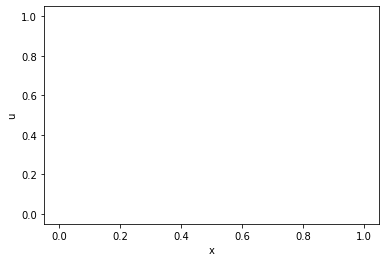

In [2]:
calculateandshow(np.exp(-100*(X-0.5)*(X-0.5)),"Neumann",1)

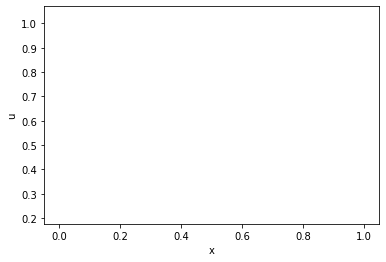

In [3]:
calculateandshow(np.exp(-100*(X-0.5)*(X-0.5))+abs(X-0.5), "Neumann", 2)

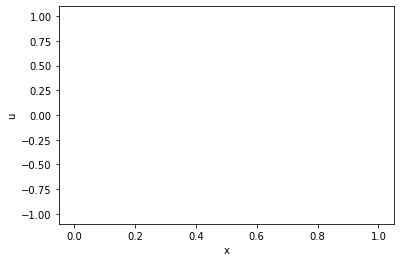

In [4]:
calculateandshow(np.exp(-100*(X-0.5)*(X-0.5)),"Dirichlet",3)

## (1)の関数を使わないバージョン

In [5]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dx = 0.0125 # 空間ステップ
dt = 0.01 # 時間ステップ
tmin = 0.0 # 計算開始時間 
tmax = 2.0 # 計算をこの時間までする

#　ｘの計算範囲（境界）
xmin = 0.0
xmax = 1.0 

c = 1.0 # 波の速度
Cw = (c*dt/dx)**2 #　定数 < 1

nx = int((xmax-xmin)/dx) + 1 # xの離散点（要素）数
nt = int((tmax-tmin)/dt) + 1 # tの離散点（要素）数
#print(nx,nt)

X = np.linspace(xmin, xmax, nx) # Xのarray
#print(X)

# 数値計算結果を格納する2Darray．とりあえず0の数値をいれている
u = np.zeros((nt,nx))  # u(t,x)
#print(u.shape)

# 初期条件
# 初期値
u_0 = np.exp(-100*(X-0.5)*(X-0.5)) 
# 初期速度
u_t = np.zeros(nx)
u[0] = u_0 # 初期条件の代入

# 1時間ステップ後の値
for ix in range(1,nx-1):
    u[1,ix] = u[0,ix] + dt * u_t[ix]+0.5*Cw*(u[0,ix-1]-2*u[0,ix]+u[0,ix+1]) 
#　ノイマン境界条件
u[1,0] = u[1,1]
u[1,nx-1] = u[1,nx-2]
#　ディリクレ境界条件
# u[1,0] = 0
# u[1,nx-1] =0

fig = plt.figure()
ims = []

#　２時間ステップ以降の計算開始
for it in range(1,nt-1):
    for ix in range(1,nx-1):
        u[it+1,ix] = 2*(1-Cw)*u[it,ix]-u[it-1,ix]+Cw*(u[it,ix-1]+u[it,ix+1])
    #　ノイマン境界条件
    u[it+1,0] = u[it+1,1]
    u[it+1,nx-1] = u[it+1,nx-2]
    #　ディリクレ境界条件
    #u[it+1,0] = 0
    #u[it+1,nx-1] =0
    
    # analytical solution
    ua_w = 0.5*np.exp(-100*(X+1*(it+1)*dt-0.5)*(X+(it+1)*dt-0.5)) +0.5*np.exp(-100*(X-1*(it+1)*dt-0.5)*(X-(it+1)*dt-0.5))

    im1 = plt.plot(X, u[it+1,:], "bo") #　数値解のプロット
    im2= plt.plot(X, ua_w, "r") #　解析解のプロット   
    ims.append(im1+im2)

ani = animation.ArtistAnimation(fig, ims) #interval=10)
plt.xlabel("x") #　横軸のラベル
plt.ylabel("u") #　縦軸のラベル
plt.show() 

<IPython.core.display.Javascript object>

解析解では、50時間ステップまでしかモデル化できていない。
各プロットが次の時間ステップの周辺のプロットに影響を与えている,受けている様子が見て取れる。
どの時間ステップでも、各プロットの縦軸の総和,平均は常に一定である

## (2)の関数を使わないバージョン

In [7]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dx = 0.0125 # 空間ステップ
dt = 0.01 # 時間ステップ
tmin = 0.0 # 計算開始時間 
tmax = 2.0 # 計算をこの時間までする

#　ｘの計算範囲（境界）
xmin = 0.0
xmax = 1.0 

c = 1.0 # 波の速度
Cw = (c*dt/dx)**2 #　定数 < 1

nx = int((xmax-xmin)/dx) + 1 # xの離散点（要素）数
nt = int((tmax-tmin)/dt) + 1 # tの離散点（要素）数
#print(nx,nt)

X = np.linspace(xmin, xmax, nx) # Xのarray
#print(X)

# 数値計算結果を格納する2Darray．とりあえず0の数値をいれている
u = np.zeros((nt,nx))  # u(t,x)
#print(u.shape)

# 初期条件
# 初期値
u_0 = np.exp(-100*(X-0.5)*(X-0.5))+abs(X-0.5) 
# 初期速度
u_t = np.zeros(nx)
u[0] = u_0 # 初期条件の代入

# 1時間ステップ後の値
for ix in range(1,nx-1):
    u[1,ix] = u[0,ix] + dt * u_t[ix]+0.5*Cw*(u[0,ix-1]-2*u[0,ix]+u[0,ix+1]) 
#　ノイマン境界条件
u[1,0] = u[1,1]
u[1,nx-1] = u[1,nx-2]
#　ディリクレ境界条件
# u[1,0] = 0
# u[1,nx-1] =0

fig = plt.figure()
ims = []

#　２時間ステップ以降の計算開始
for it in range(1,nt-1):
    for ix in range(1,nx-1):
        u[it+1,ix] = 2*(1-Cw)*u[it,ix]-u[it-1,ix]+Cw*(u[it,ix-1]+u[it,ix+1])
    #　ノイマン境界条件
    u[it+1,0] = u[it+1,1]
    u[it+1,nx-1] = u[it+1,nx-2]
    #　ディリクレ境界条件
    #u[it+1,0] = 0
    #u[it+1,nx-1] =0
    
    im1 = plt.plot(X, u[it+1,:], "bo") #　数値解のプロット
    ims.append(im1)
    
ani = animation.ArtistAnimation(fig, ims) #interval=10)
plt.xlabel("x") #　横軸のラベル
plt.ylabel("u") #　縦軸のラベル
plt.show() 

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

どの時間ステップでも、各プロットの縦軸の総和,平均は常に一定であるということが、他のアニメーションよりもわかりやすい。

## (3)の関数を使わないバージョン

In [8]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dx = 0.0125 # 空間ステップ
dt = 0.01 # 時間ステップ
tmin = 0.0 # 計算開始時間 
tmax = 2.0 # 計算をこの時間までする

#　ｘの計算範囲（境界）
xmin = 0.0
xmax = 1.0 

c = 1.0 # 波の速度
Cw = (c*dt/dx)**2 #　定数 < 1

nx = int((xmax-xmin)/dx) + 1 # xの離散点（要素）数
nt = int((tmax-tmin)/dt) + 1 # tの離散点（要素）数
#print(nx,nt)

X = np.linspace(xmin, xmax, nx) # Xのarray
#print(X)

# 数値計算結果を格納する2Darray．とりあえず0の数値をいれている
u = np.zeros((nt,nx))  # u(t,x)
#print(u.shape)

# 初期条件
# 初期値
u_0 = np.exp(-100*(X-0.5)*(X-0.5)) 
# 初期速度
u_t = np.zeros(nx)
u[0] = u_0 # 初期条件の代入

# 1時間ステップ後の値
for ix in range(1,nx-1):
    u[1,ix] = u[0,ix] + dt * u_t[ix]+0.5*Cw*(u[0,ix-1]-2*u[0,ix]+u[0,ix+1]) 
#　ノイマン境界条件
#u[1,0] = u[1,1]
#u[1,nx-1] = u[1,nx-2]
#　ディリクレ境界条件
u[1,0] = 0
u[1,nx-1] =0

fig = plt.figure()
ims = []

#　２時間ステップ以降の計算開始
for it in range(1,nt-1):
    for ix in range(1,nx-1):
        u[it+1,ix] = 2*(1-Cw)*u[it,ix]-u[it-1,ix]+Cw*(u[it,ix-1]+u[it,ix+1])
    #　ノイマン境界条件
    #u[it+1,0] = u[it+1,1]
    #u[it+1,nx-1] = u[it+1,nx-2]
    #　ディリクレ境界条件
    u[it+1,0] = 0
    u[it+1,nx-1] =0
    
    # analytical solution
    ua_w = 0.5*np.exp(-100*(X+1*(it+1)*dt-0.5)*(X+(it+1)*dt-0.5)) +0.5*np.exp(-100*(X-1*(it+1)*dt-0.5)*(X-(it+1)*dt-0.5))

    im1 = plt.plot(X, u[it+1,:], "bo") #　数値解のプロット
    im2= plt.plot(X, ua_w, "r") #　解析解のプロット   
    ims.append(im1+im2)

ani = animation.ArtistAnimation(fig, ims) #interval=10)
plt.xlabel("x") #　横軸のラベル
plt.ylabel("u") #　縦軸のラベル
plt.show() 

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

x=0,1の両端で線が制限を受け、むちを打つときのように引っ張られて正負が入れ替わる。
(多分加速度が一定の大きさを超えると、周辺のプロットが引っ張られ、正負が入れ替わる？？)
なんとなく伝わりますかね？言語化しづらい...
ただ、波のない部分(極値でない部分)は原点にいようとするので、リアルの挙動で例えようとするといい例が思い浮かばない...

## 2. 拡散方程式

$ 
\displaystyle \frac{\partial u(x,t)}{\partial t} =\frac{\partial^2 u(x,t)}{\partial x^2} 
$

を差分法により数値的に解く．計算の空間領域 $x=[0, 1]$ ，時間領域 $t=[0, 0.2]$とする．

(1)　初期条件を$ u(x,0)=\mathrm{sin}(\pi x)$，境界条件を$u(0,t)=u(1,t)=0，$とする．この時，$\Delta t=0.002, \Delta x=0.1$として求めた数値解が以下の解析解

$ 
\displaystyle u(x,t)=\mathrm{exp}(-\pi^2t)\mathrm{sin}(\pi x)
$

と一致することをアニメーションにより示しなさい．また，変化の様子についてコメントしなさい．

(2)　(1)の問題で，初期条件と境界条件を自分で考えて与え，その時の数値解の様子をアニメーションにより示しなさい．また，変化の様子についてコメントしなさい．

(3)　(1)の問題で，$\Delta t=0.002, \Delta x=0.05$として求めた数値解が不安定化して振動する様子をアニメーションにより確認しなさい．また，このような数値的な不安定を避ける方法について調べて紹介しなさい．

拡散方程式の方は、関数を使わずにやりました(提出前ギリギリで時間がない)

In [9]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dx = 0.1 # 空間ステップ
dt = 0.002 # 時間ステップ
tmin = 0.0 # 計算開始時間 
tmax = 0.2 # 計算をこの時間までする

#　ｘの計算範囲（境界）
xmin = 0.0
xmax = 1.0 

c = 1.0 # 波の速度
Cw = (c*dt/dx)**2 #　定数 < 1

nx = int((xmax-xmin)/dx) + 1 # xの離散点（要素）数
nt = int((tmax-tmin)/dt) + 1 # tの離散点（要素）数
#print(nx,nt) nx:11, nt:101

X = np.linspace(xmin, xmax, nx) # Xのarray
print(X.shape)

# 数値計算結果を格納する2Darray．とりあえず0の数値をいれている
u = np.zeros((nt,nx))  # u(t,x)
print(u.shape)


# 初期条件
# 初期値
u_0 =np.sin(X*np.pi)
print(u_0.shape)
# 初期速度
u_t = np.zeros(nx)
u[0] = u_0 # 初期条件の代入


# 1時間ステップ後の値
for ix in range(1,nx-1):
    u[1,ix] = u[0,ix]+(dt/(dx*dx))*(u[0,ix-1]-2*u[0,ix]+u[0,ix+1])
#　ノイマン境界条件
#u[1,0] = u[1,1]
#u[1,nx-1] = u[1,nx-2]
#　ディリクレ境界条件
u[1,0] = 0
u[1,nx-1] =0

fig = plt.figure()
ims = []

#　２時間ステップ以降の計算開始
for it in range(1,nt-1):
    for ix in range(1,nx-1):
        u[it+1,ix] = u[it,ix]+(dt/(dx*dx))*(u[it,ix-1]-2*u[it,ix]+u[it,ix+1]) 
    #　ノイマン境界条件
    #u[it+1,0] = u[it+1,1]
    #u[it+1,nx-1] = u[it+1,nx-2]
    #　ディリクレ境界条件
    u[it+1,0] = 0
    u[it+1,nx-1] =0
    
    #𝑢(𝑥,𝑡)=exp(−𝜋2𝑡)sin(𝜋𝑥)
    # analytical solution
    ua_w = np.exp(-np.pi*np.pi*dt*it)*np.sin(np.pi*X)

    im1 = plt.plot(X, u[it+1,:], "bo") #　数値解のプロット
    im2= plt.plot(X, ua_w, "g") #　解析解のプロット   
    ims.append(im1+im2)

ani = animation.ArtistAnimation(fig, ims,interval = 100) 
plt.xlabel("x") #　横軸のラベル
plt.ylabel("u") #　縦軸のラベル
plt.show() 

(11,)
(101, 11)
(11,)


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

In [10]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dx = 0.1 # 空間ステップ
dt = 0.002 # 時間ステップ
tmin = 0.0 # 計算開始時間 
tmax = 0.2 # 計算をこの時間までする

#　ｘの計算範囲（境界）
xmin = 0.0
xmax = 1.0 

c = 1.0 # 波の速度
Cw = (c*dt/dx)**2 #　定数 < 1

nx = int((xmax-xmin)/dx) + 1 # xの離散点（要素）数
nt = int((tmax-tmin)/dt) + 1 # tの離散点（要素）数
print(nx,nt) #nx:11, nt:101

X = np.linspace(xmin, xmax, nx) # Xのarray
print(X.shape)

# 数値計算結果を格納する2Darray．とりあえず0の数値をいれている
u = np.zeros((nt,nx))  # u(t,x)
print(u.shape)

# 初期条件
# 初期値
u_0 =X*X*np.pi
print(u_0.shape)
# 初期速度
u_t = np.zeros(nx)
u[0] = u_0 # 初期条件の代入


# 1時間ステップ後の値
for ix in range(1,nx-1):
    u[1,ix] = u[0,ix]+(dt/(dx*dx))*(u[0,ix-1]-2*u[0,ix]+u[0,ix+1])
#　ノイマン境界条件
u[1,0] = u[0,ix]
u[1,nx-1] = 1-u[0,ix]
#　ディリクレ境界条件
#u[1,0] = 0
#u[1,nx-1] =0

fig = plt.figure()
ims = []

#　２時間ステップ以降の計算開始
for it in range(1,nt-1):
    for ix in range(1,nx-1):
        u[it+1,ix] = u[it,ix]+(dt/(dx*dx))*(u[it,ix-1]-2*u[it,ix]+u[it,ix+1]) 
    #　ノイマン境界条件
    #u[it+1,0] = u[it+1,1]
    #u[it+1,nx-1] = u[it+1,nx-2]
    #　ディリクレ境界条件
    u[it+1,0] = u[it,ix]
    u[it+1,nx-1] =1-u[it,ix]
    
    im1 = plt.plot(X, u[it+1,:], "bo") #　数値解のプロット
    ims.append(im1)

ani = animation.ArtistAnimation(fig, ims,interval = 100) 
plt.xlabel("x") #　横軸のラベル
plt.ylabel("u") #　縦軸のラベル
plt.show() 

11 101
(11,)
(101, 11)
(11,)


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

境界条件は簡単に言うと、両端を制限するものだとここでわかった。

21 101
(21,)
(101, 21)
(21,)


<IPython.core.display.Javascript object>


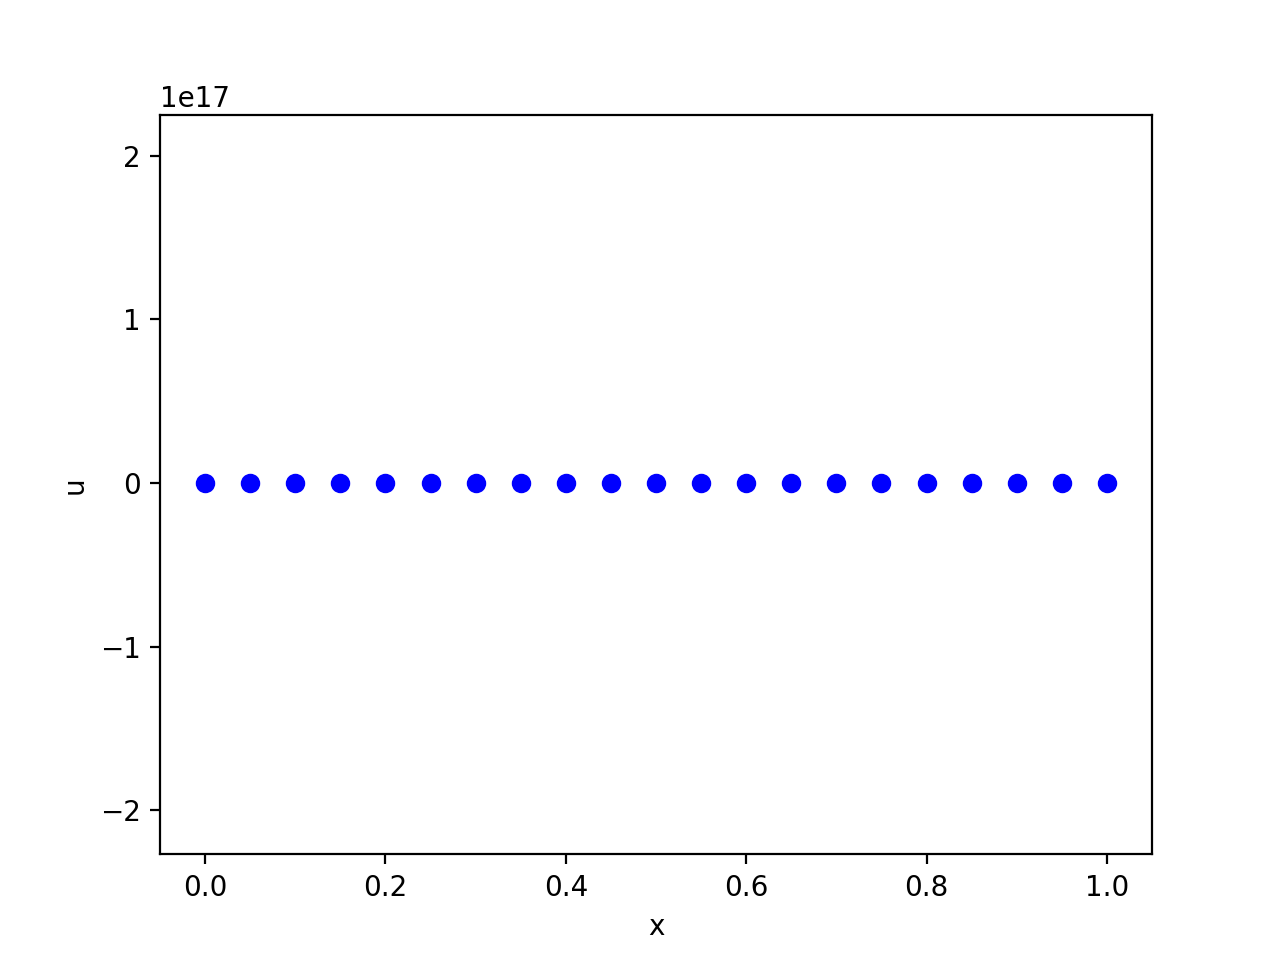

In [ ]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

dx = 0.05 # 空間ステップ
dt = 0.002 # 時間ステップ
tmin = 0.0 # 計算開始時間 
tmax = 0.2 # 計算をこの時間までする

#　ｘの計算範囲（境界）
xmin = 0.0
xmax = 1.0 

c = 1.0 # 波の速度
Cw = (c*dt/dx)**2 #　定数 < 1

nx = int((xmax-xmin)/dx) + 1 # xの離散点（要素）数
nt = int((tmax-tmin)/dt) + 1 # tの離散点（要素）数
print(nx,nt) #nx:11, nt:101

X = np.linspace(xmin, xmax, nx) # Xのarray
print(X.shape)

# 数値計算結果を格納する2Darray．とりあえず0の数値をいれている
u = np.zeros((nt,nx))  # u(t,x)
print(u.shape)

# 初期条件
# 初期値
u_0 =np.sin(X*np.pi)
print(u_0.shape)
# 初期速度
u_t = np.zeros(nx)
u[0] = u_0 # 初期条件の代入


# 1時間ステップ後の値
for ix in range(1,nx-1):
    u[1,ix] = u[0,ix]+(dt/(dx*dx))*(u[0,ix-1]-2*u[0,ix]+u[0,ix+1])
#　ノイマン境界条件
#u[1,0] = u[1,1]
#u[1,nx-1] = u[1,nx-2]
#　ディリクレ境界条件
u[1,0] = 0
u[1,nx-1] =0

fig = plt.figure()
ims = []

#　２時間ステップ以降の計算開始
for it in range(1,nt-1):
    for ix in range(1,nx-1):
        u[it+1,ix] = u[it,ix]+(dt/(dx*dx))*(u[it,ix-1]-2*u[it,ix]+u[it,ix+1]) 
    #　ノイマン境界条件
    #u[it+1,0] = u[it+1,1]
    #u[it+1,nx-1] = u[it+1,nx-2]
    #　ディリクレ境界条件
    u[it+1,0] = 0
    u[it+1,nx-1] =0

    im1 = plt.plot(X, u[it+1,:], "bo") #　数値解のプロット
    ims.append(im1)
ani = animation.ArtistAnimation(fig, ims,interval = 100) 
plt.xlabel("x") #　横軸のラベル
plt.ylabel("u") #　縦軸のラベル
plt.show() 

0.1から0.05にかけて少しずつずらしてみたが、いきなり変わった。
正直よくわからない。横軸の幅は一定に定められていて、中のプロットの数が変わったところで挙動には影響がないと思ってしまうが、理解できない。

## 3. 学期を通して講義に関する質問・コメントを書いてください． 

正直、一年生には少し同情してしまう。
確かにプログラミング言語に触れることは今の時代重要だが、生物資源の特性を考えると、まともにプログラムを書くのはこの授業が初めての人も少なくはないはず。それなのに、いきなりデータサイエンスだと、プログラミングが億劫になってしまう人間もでてきてしまうのではないか。